In [44]:
from numpy import mean, std
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [45]:
# define date range
start_date = '2005-01-22'
end_date  = datetime.today().strftime('%Y-%m-%d')


In [46]:
# retrieve markets

#data = yf.download(['GC=F', 'QLTA', '^TNX', 'SPY'], start_date, end_date)

data = yf.download(['GC=F', 'QLTA', '^TNX', 'BTC-USD', 'ETH-USD', 'SPY'], start_date, end_date)
#data = yf.download(['MSFT', 'TSLA', 'AAPL', 'AMZN', 'SPY'], start_date, end_date)

print(data.head())

[*********************100%***********************]  6 of 6 completed
           Adj Close                                              Close  \
             BTC-USD ETH-USD        GC=F QLTA        SPY   ^TNX BTC-USD   
Date                                                                      
2005-01-24       NaN     NaN  426.899994  NaN  81.935272  4.122     NaN   
2005-01-25       NaN     NaN  422.000000  NaN  82.167282  4.189     NaN   
2005-01-26       NaN     NaN  426.899994  NaN  82.413361  4.192     NaN   
2005-01-27       NaN     NaN  426.299988  NaN  82.553940  4.207     NaN   
2005-01-28       NaN     NaN  425.799988  NaN  82.553940  4.138     NaN   

                                     ...        Open                          \
           ETH-USD        GC=F QLTA  ...        GC=F QLTA         SPY   ^TNX   
Date                                 ...                                       
2005-01-24     NaN  426.899994  NaN  ...  426.899994  NaN  117.089996  4.136   
2005-01-25

In [47]:
data = data.dropna()

In [48]:
# visualization functions

def rrg_plot(df, symbol, period = 20):
    """
    Method to visualize RRG plot for one market/symbol. The benchmark is SPY
    """
    df = df.copy()
    df =df.iloc[-period:]
    
    last = df.iloc[-1]    
    others = df.iloc[:-1]    

    plt.axvline(x = 0, color = 'b')
    plt.axhline(y = 0, color = 'b')

    plt.plot(df[f'{symbol}_ratio'], df[f'{symbol}_momentum'])
    plt.scatter(last[f'{symbol}_ratio'], last[f'{symbol}_momentum'], marker='o')
    plt.scatter(others[f'{symbol}_ratio'], others[f'{symbol}_momentum'], marker='x')

    plt.title(symbol)
    plt.xlabel("RS ratio")
    plt.ylabel("RS momentum")

    plt.show()
    
def visualize_rs(df, symbol:str, window_len=120):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ax[0].plot(df[f'{symbol}_ratio'][-window_len:])
    ax[0].set_title(f'RS ratio {symbol}')
    #ax[0].legend()

    ax[1].plot(df[f'{symbol}_momentum'][-window_len:])
    ax[1].set_title(f'RS momentum {symbol}')
    #ax[1].legend()
    plt.show()

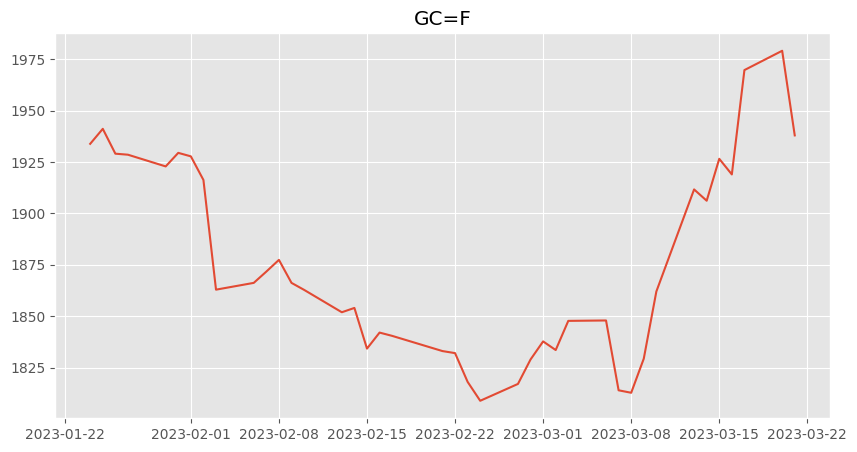

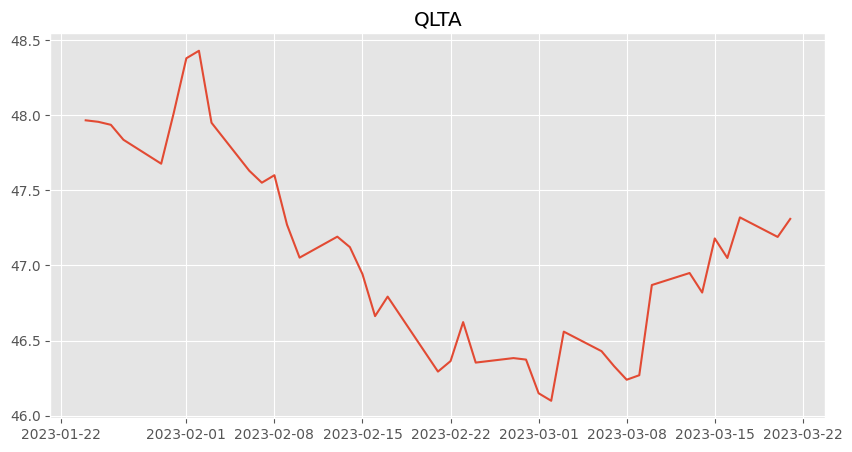

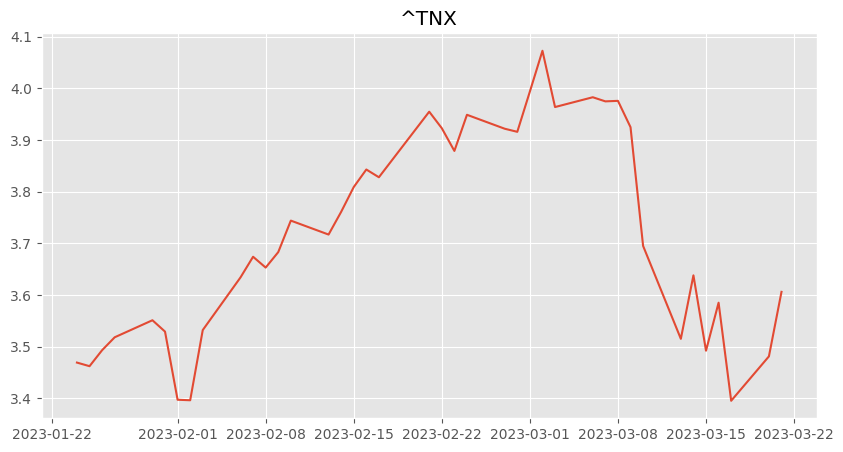

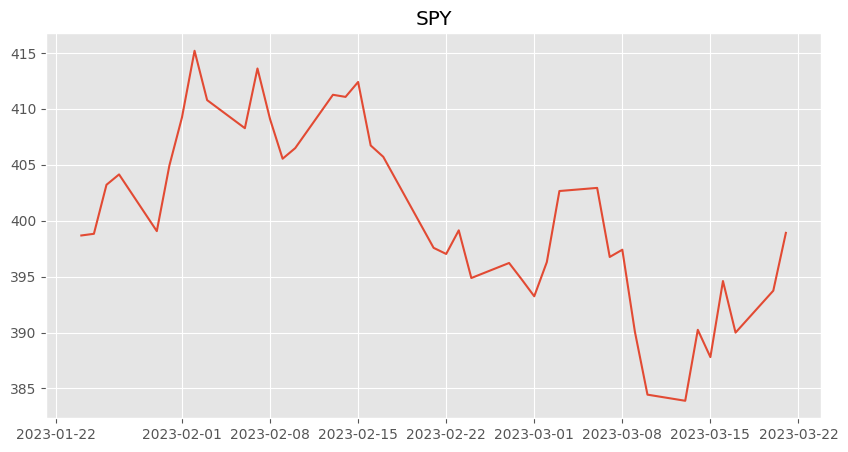

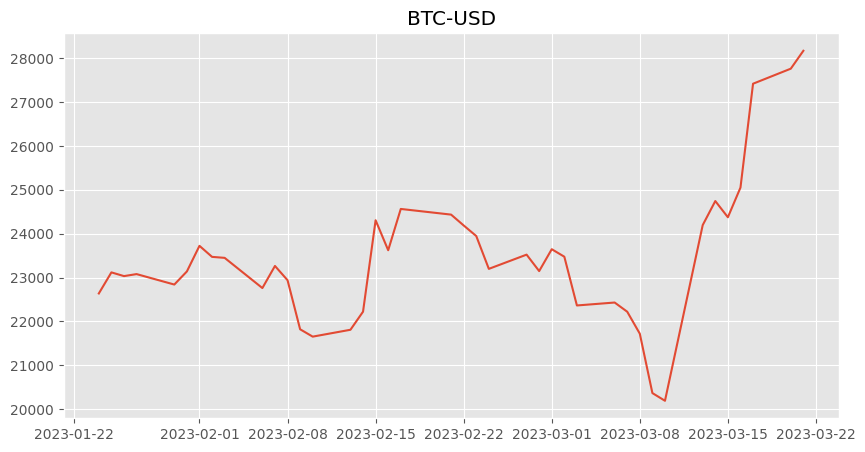

In [49]:
# visualize assets and benchmark

plt.figure(figsize = [10, 5])
plt.plot(data[('Adj Close', 'GC=F')][-40:])
plt.title('GC=F')
plt.show()

plt.figure(figsize = [10, 5])
plt.plot(data[('Adj Close', 'QLTA')][-40:])
plt.title('QLTA')
plt.show()

plt.figure(figsize = [10, 5])
plt.plot(data[('Adj Close', '^TNX')][-40:])
plt.title('^TNX')
plt.show()

plt.figure(figsize = [10, 5])
plt.plot(data[('Adj Close', 'SPY')][-40:])
plt.title('SPY')
plt.show()

plt.figure(figsize = [10, 5])
plt.plot(data[('Adj Close', 'BTC-USD')][-40:])
plt.title('BTC-USD')
plt.show()

### RRG on daily returns

In [50]:
def rs_ratio(prices_df, benchmark, window=10):
    
    """
    Function that returns dataframe with relative strength ratio for each symbol (days)
    """
    
    # create new dataframe
    index = prices_df.index
    ratio_df = pd.DataFrame(index=index)
    ratio_df.index = pd.to_datetime(ratio_df.index)
    
    benchmark = benchmark.rolling(8).mean() #12
    benchmark = benchmark.pct_change(3) #5
    
    #plt.plot(benchmark[-200:])

    for column in prices_df:
        prices_df[column] = prices_df[column].rolling(8).mean()
        prices_df[f'{column}_return'] = prices_df[column].pct_change(3)
        prices_df[f'{column}_ratio'] = prices_df[f'{column}_return'] - benchmark
        
    return prices_df.rolling(10).mean()

ratio_df = rs_ratio(data['Adj Close'], data[('Adj Close', 'SPY')])

In [51]:
def rs_momentum(ratio_df):
    index = ratio_df.index

    momentum_df = pd.DataFrame(index=index)

    for column in ratio_df:
        name = column.split('_')[0]
        rs_momentum = ratio_df[column] - ratio_df[column].shift(5)
        momentum_df[f'{name}_momentum'] = rs_momentum.rolling(4).mean()
        
    return momentum_df

momentum_df = rs_momentum(ratio_df)

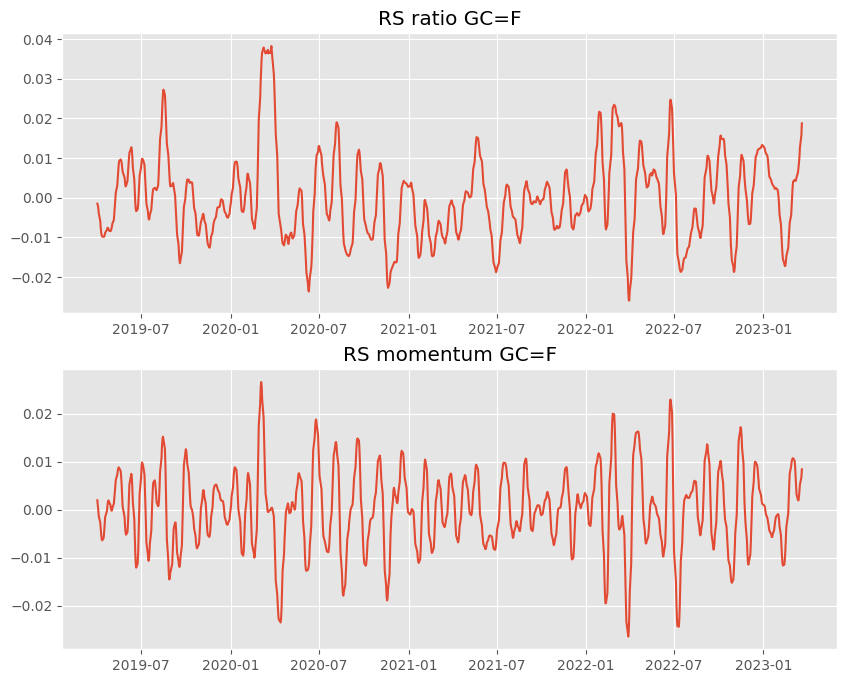

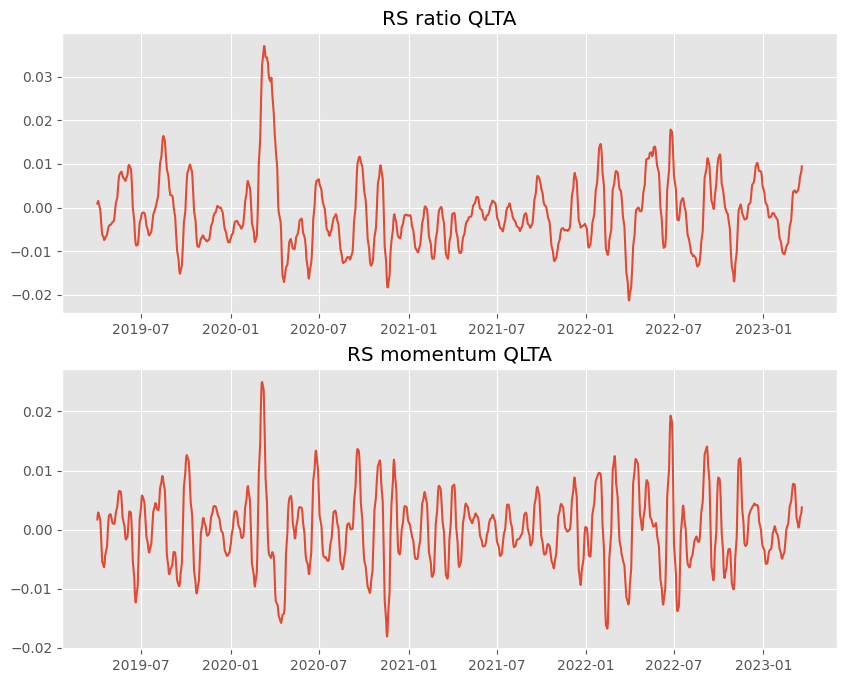

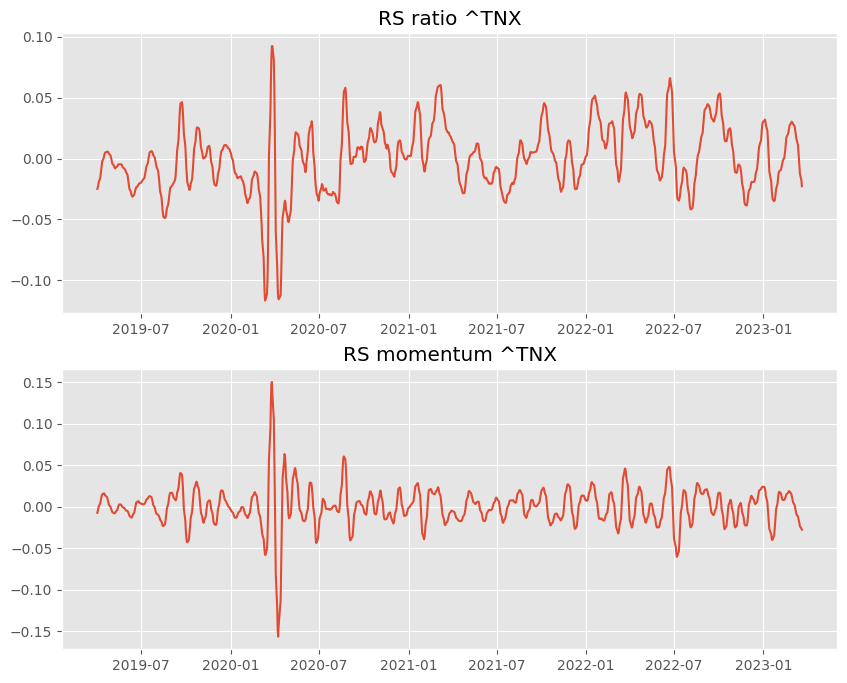

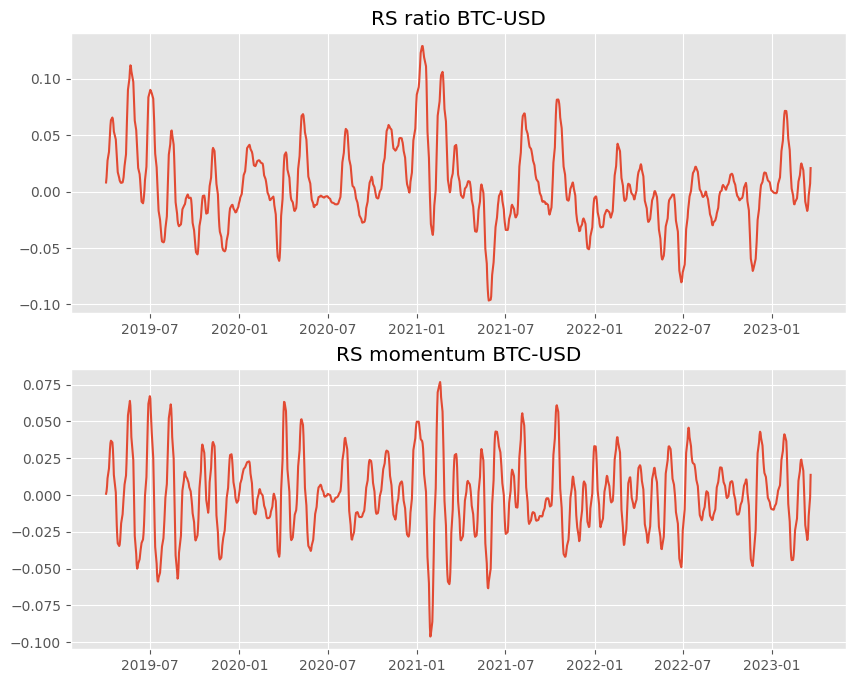

In [52]:
df = pd.merge(ratio_df, momentum_df, left_on=ratio_df.index, right_on=momentum_df.index).set_index('key_0')

visualize_rs(df, 'GC=F', 1000)
visualize_rs(df, 'QLTA', 1000)
visualize_rs(df, '^TNX', 1000)
visualize_rs(df, 'BTC-USD', 1000)

#visualize_rs('MSFT', 130)
#visualize_rs('TSLA', 130)
#visualize_rs('AAPL', 130)
#visualize_rs('AMZN', 130)

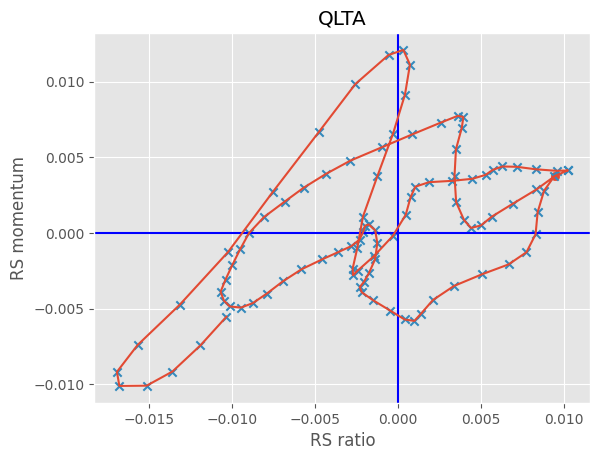

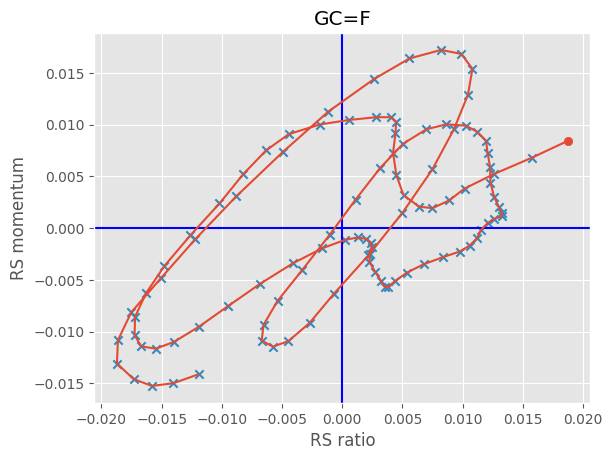

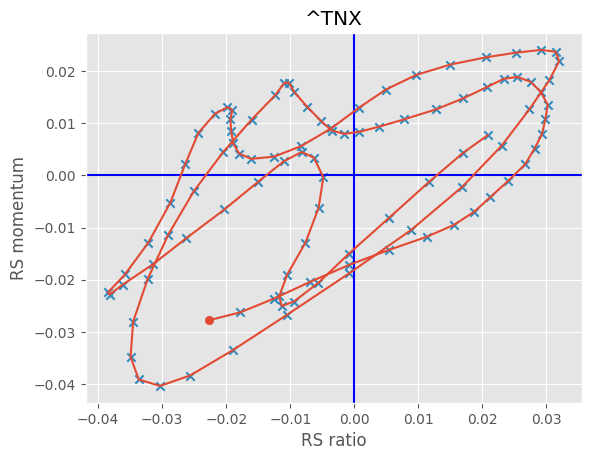

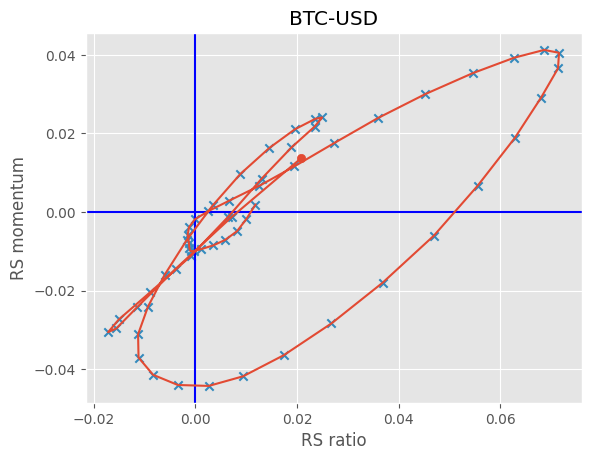

In [53]:

    
df = pd.merge(ratio_df, momentum_df, left_on=ratio_df.index, right_on=momentum_df.index).set_index('key_0')

rrg_plot(df, 'QLTA', 100)
rrg_plot(df, 'GC=F', 100)
rrg_plot(df, '^TNX', 100)
rrg_plot(df, 'BTC-USD', 60)

#rrg_plot(df, 'TSLA', 100)
#rrg_plot(df, 'AAPL', 100)
#rrg_plot(df, 'MSFT', 100)
#rrg_plot(df, 'AMZN', 100)

### RRG on weekly returns

In [54]:
# preprocessing

# average prices or average returns????


print(data.shape)


def week_returns(df):
    dff = df.copy()
    weekly_averages = dff.resample('W').mean()

    # Reset the index to make the datetime column a regular column
    weekly_averages = weekly_averages.reset_index()
    return weekly_averages.set_index('Date')

data_weekly = week_returns(data)

print(data_weekly.shape)

(1347, 36)
(281, 36)


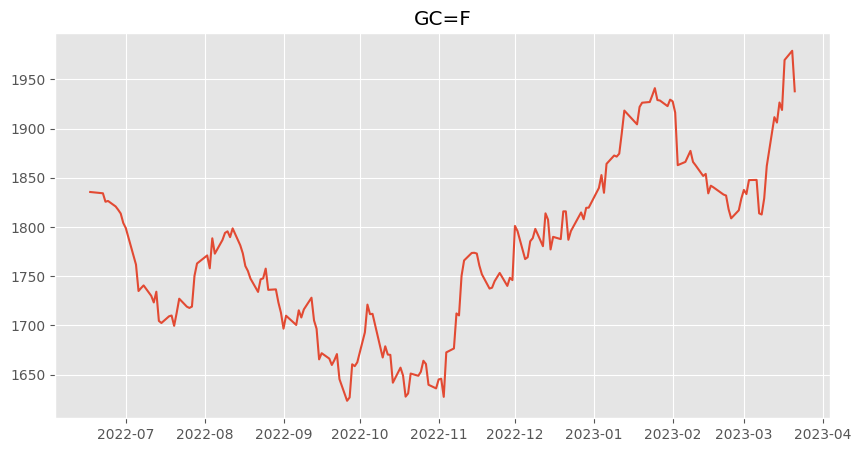

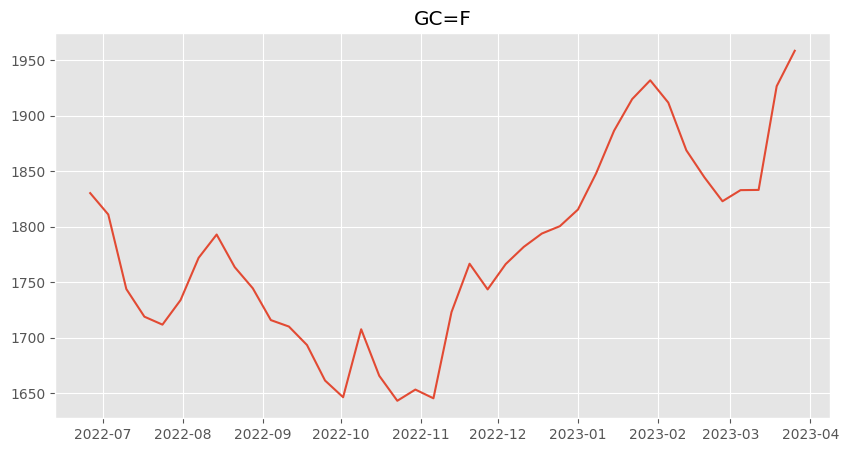

In [55]:
# visualize assets and benchmark

plt.figure(figsize = [10, 5])
plt.plot(data[('Adj Close', 'GC=F')][-190:])
plt.title('GC=F')
plt.show()

plt.figure(figsize = [10, 5])
plt.plot(data_weekly[('Adj Close', 'GC=F')][-40:])
plt.title('GC=F')
plt.show()





In [67]:
def rs_ratio(prices_df, benchmark, window=10):
    
    """
    Function that returns dataframe with relative strength ratio for each symbol (days)
    """
    
    # create new dataframe
    index = prices_df.index
    ratio_df = pd.DataFrame(index=index)
    ratio_df.index = pd.to_datetime(ratio_df.index)
    
    benchmark = benchmark.rolling(3).mean()
    benchmark = benchmark.pct_change(3)
    
    #plt.plot(benchmark[-200:])

    for column in prices_df:
        prices_df[column] = prices_df[column].rolling(3).mean()
        prices_df[f'{column}_return'] = prices_df[column].pct_change(3)
        prices_df[f'{column}_ratio'] = prices_df[f'{column}_return'] - benchmark
        
    return prices_df.rolling(10).mean()

ratio_df = rs_ratio(data_weekly['Adj Close'], data_weekly[('Adj Close', 'SPY')])

In [68]:
def rs_momentum(ratio_df):
    index = ratio_df.index

    momentum_df = pd.DataFrame(index=index)

    for column in ratio_df:
        name = column.split('_')[0]
        rs_momentum = ratio_df[column] - ratio_df[column].shift(3)
        momentum_df[f'{name}_momentum'] = rs_momentum#.rolling(3).mean()
        
    return momentum_df

momentum_df = rs_momentum(ratio_df)

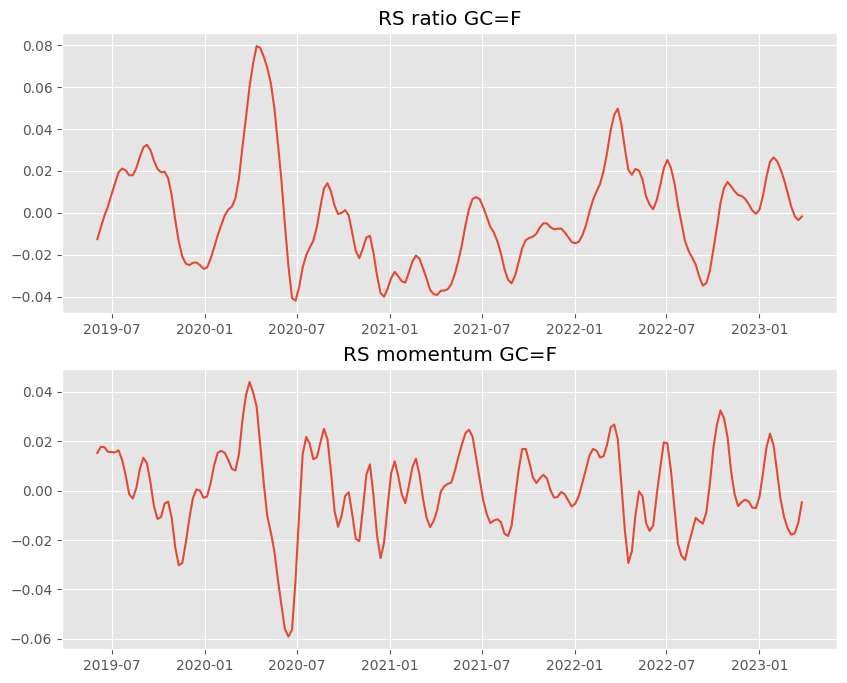

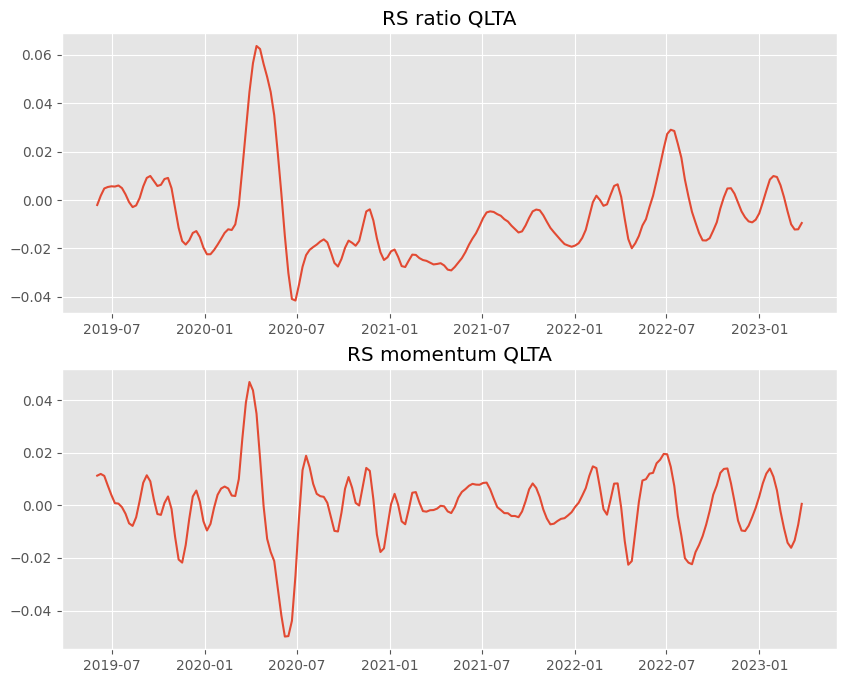

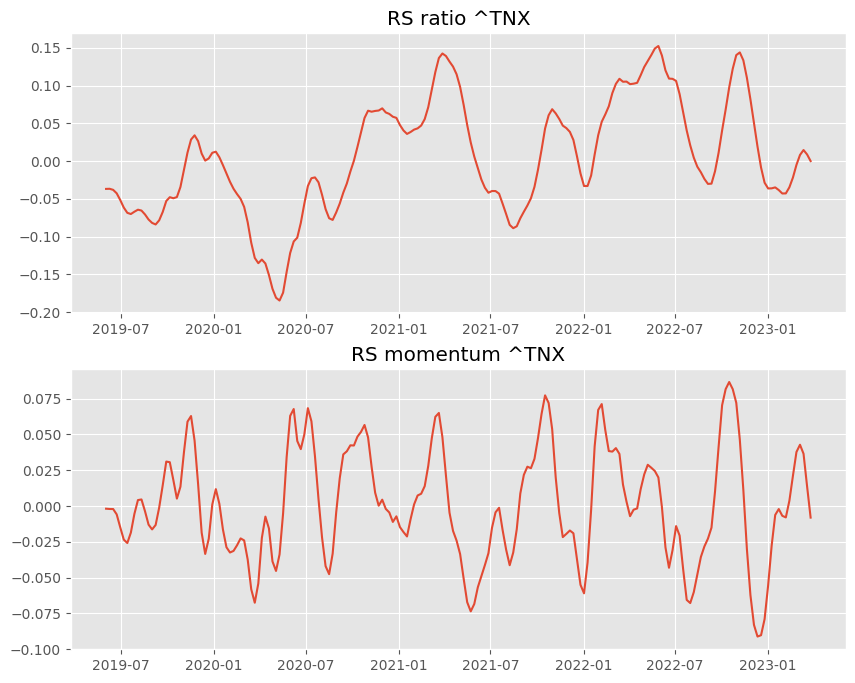

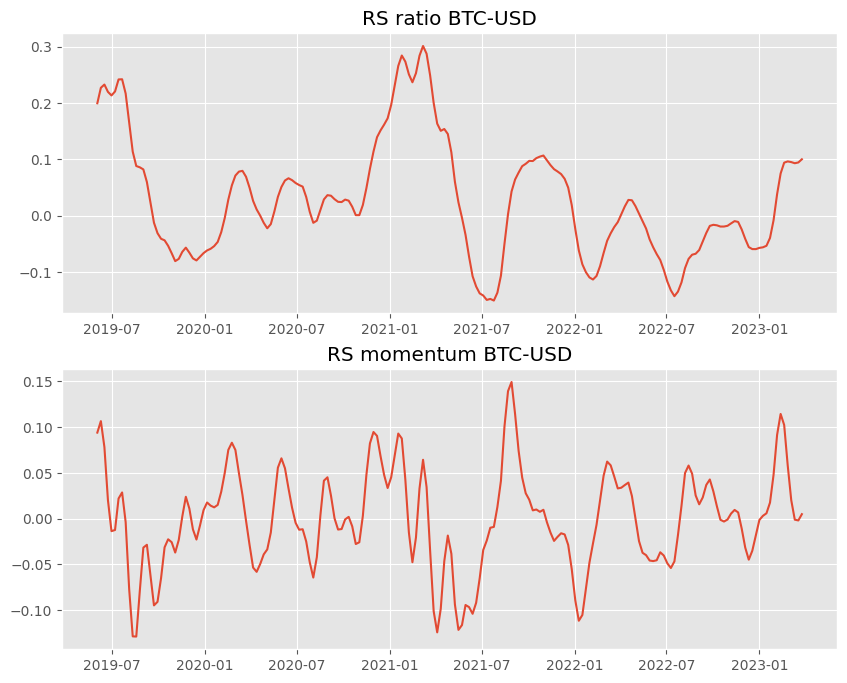

In [69]:
df = pd.merge(ratio_df, momentum_df, left_on=ratio_df.index, right_on=momentum_df.index).set_index('key_0')


visualize_rs(df, 'GC=F', 200)
visualize_rs(df, 'QLTA', 200)
visualize_rs(df, '^TNX', 200)
visualize_rs(df, 'BTC-USD', 200)

#visualize_rs('MSFT', 130)
#visualize_rs('TSLA', 130)
#visualize_rs('AAPL', 130)
#visualize_rs('AMZN', 130)

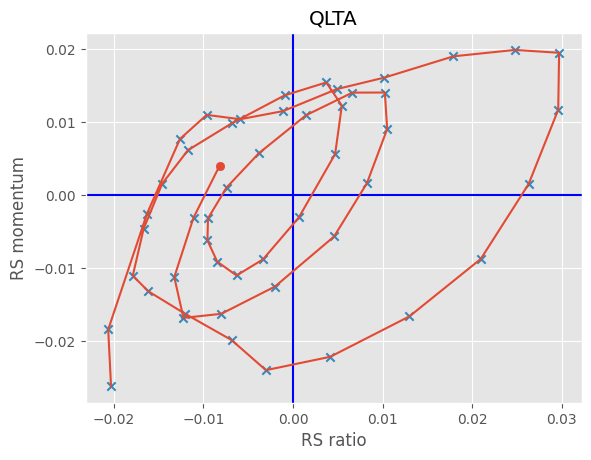

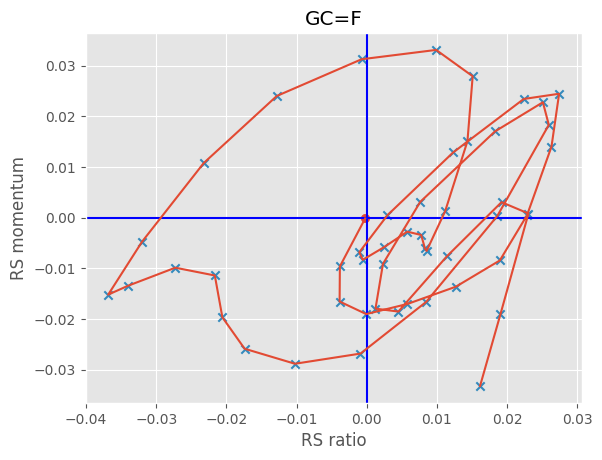

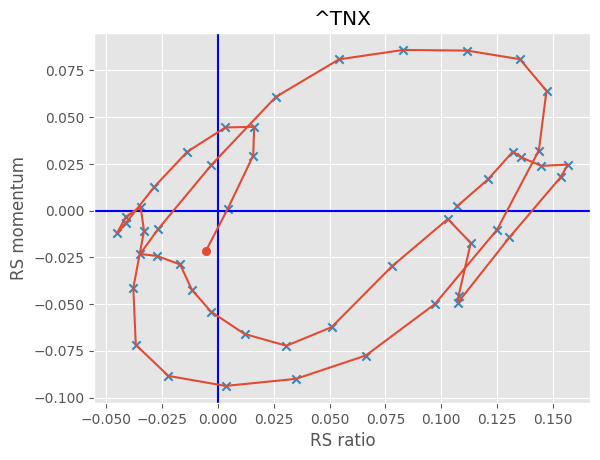

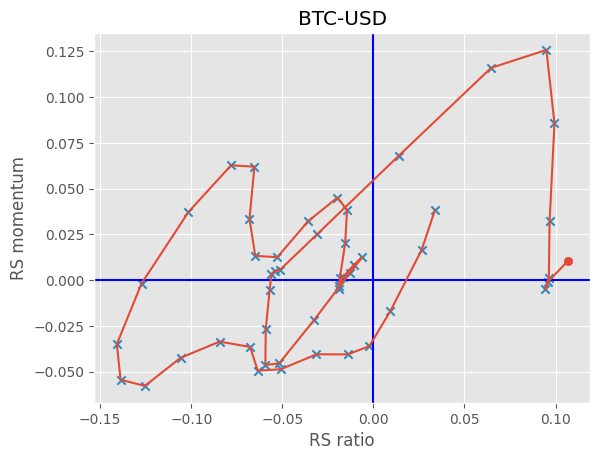

In [59]:

    

rrg_plot(df, 'QLTA', 50)
rrg_plot(df, 'GC=F', 50)
rrg_plot(df, '^TNX', 50)
rrg_plot(df, 'BTC-USD', 50)

#rrg_plot(df, 'TSLA', 100)
#rrg_plot(df, 'AAPL', 100)
#rrg_plot(df, 'MSFT', 100)
#rrg_plot(df, 'AMZN', 100)